In [1]:
from __future__ import division
from numpy import *
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import csv
# import scipy as sp
# import prettyplotlib as ppl

import seaborn as sns
from pylab import *

sns.set_style('whitegrid')
sns.set(style="ticks", palette="Set2")
sns.despine()

%matplotlib inline

# TABULACIÓN Y LIMPIEZA DE DATOS:

In [2]:
!open .
!pwd

/Users/mmngreco/Google Drive/GitHub/python_para_economistas/Fiscal


In [3]:
cls = open('variables.txt', 'r')
cols = csv.reader(cls).next()
for i, e in enumerate(cols):
    print i, e

0 ccaa
1 tramo
2 marcafuente
3 factor
4 fechappal
5 sexoppal
6 tipotributacion
7 categoriadecla
8 minimosdecla
9 rentamuestreo
10 ingresostrabajo
11 c17
12 c455
13 c465
14 c620
15 c630
16 c679
17 c698
18 c699
19 c720
20 c721
21 c732


In [4]:
dwork = pd.read_csv('dwork.csv')

# INFORMACIÓN UTIL:

In [5]:
cs = [u'Código que identifica la Comunidad Autónoma de residencia fiscal del declarante o de los declaran­ tes. Hay un total de 17 códigos, las comunidades de régimen común más las dos Ciudades Autóno­ mas Ceuta y Melilla, los cuales se pueden consultar en la Tabla 3 del anexo.',
u'Esta variable es creada para la estratificación, nos dice el tramo de la variable renta muestreo en el que se encuentra cada observación. Distinguimos 10 tramos y a cada uno se le asignara un número',
u'Esta variable es creada para la estratificación, en ella se crean dos categorías para agrupar las decla­ raciones en función de la renta del trabajo. La variable que clasificamos es la resultante entre ingre­ sos trabajo y renta muestreo',
u'Factor de elevación poblacional de la observación. Se calcula como el cociente entre el tamaño po­ blacional del estrato al que pertenece la declaración y el tamaño muestral de ese mismo estrato.',
u'Indica la fecha de nacimiento del primer declarante en el formato AAAAMMDD.',
u'Sexo del declarante principal. Toma valor 1 para hombres y 2 para mujeres.',
u'Indica el régimen tributario al que pertenece la declaración. Se denota por I en el caso de declaración individual y por C en el caso de conjunta.',
u'Variable creada para recoger las posibles combinaciones del tipo de tributación y el estado civil.',
u'Variable creada para recoger la aplicación de mínimos personales y familiares en la declaración. To­ ma valor 9 en todas las declaraciones con errores y en la mayoría de las declaraciones entre 1999 y 2002, ya que no es posible conocer los valores de los mínimos.',
u'Variable de renta utilizada en el muestreo. Creada mediante la suma de ingresos íntegros, rendimien­ tos e imputaciones de renta del modelo 100 del IRPF para el año en cuestión.',
u'Recoge la renta que proviene de los ingresos íntegros del trabajo, a través de las casillas del modelo 100 de IRPF para el año en cuestión.',
u'RENDIMIENTOS DEL TRABAJO: REDUCCIÓN CON CARÁCTER GENERAL',
u'BASE IMPONIBLE GENERAL (450 ­ 451 + 452 ­ 453 ­ 454)',
u'BASE IMPONIBLE DEL AHORRO (457 ­ 458 + 460 ­ 461)',
u'BASE LIQUIDABLE GENERAL SOMETIDA A GRAVAMEN. (618 ­ 619)',
u'BASE LIQUIDABLE DEL AHORRO (465 ­ 621 ­ 622 ­ 623)',
u'MÍNIMO PERSONAL Y FAMILIAR (675 + 676 + 677 + 678)',
u'CUOTAS INTEGRAS (693 + 696) (Parte Estatal)',
u'CUOTAS INTEGRAS (694 + 697) (Parte Autonómica)',
u'CUOTA LIQUIDA ESTATAL ( 698 - 700 - 702 - 704 - 706 - 708 - 710 - 712 - 714 - 716 )',
u'CUOTA LIQUIDA AUTONOMICA ( 699 - 701 - 703 - 705 - 707 - 709 - 711 - 713 - 715 - 717 )',
u'CUOTA LIQUIDA INCREMENTADA TOTAL. ( 730 + 731 )']


In [6]:
info = []
info = zip(cols, cs)
info = dict(info)

In [7]:
trans_ccaa_accentos = {1 : 'Andalucía',
              2 : 'Aragón',
              3 : 'Principado de Asturias',
              4 : 'Illes Baleares',
              5 : 'Canarias',
              6 : 'Cantabria',
              7 : 'Castilla-La Mancha',
              8 : 'Castilla y León',
              9 : 'Cataluña',
              10 : 'Extremadura',
              11 : 'Galicia',
              12 : 'Comunidad de Madrid',
              13 : 'Región de Murcia',
              16 : 'La Rioja',
              17 : 'Comunidad Valenciana',
              18 : 'Ceuta',
              19 : 'Melilla'}

trans_ccaa = {1 : 'Andalucia',
              2 : 'Aragon',
              3 : 'Principado de Asturias',
              4 : 'Illes Baleares',
              5 : 'Canarias',
              6 : 'Cantabria',
              7 : 'Castilla-La Mancha',
              8 : 'Castilla y Leon',
              9 : 'Catalunya',
              10 : 'Extremadura',
              11 : 'Galicia',
              12 : 'Comunidad de Madrid',
              13 : 'Region de Murcia',
              16 : 'La Rioja',
              17 : 'Comunidad Valenciana',
              18 : 'Ceuta',
              19 : 'Melilla'}

In [8]:
trans_tramo = {1 : 'Negativas y cero',
               2 : 'De 0,01 a 3.000,00',
               3 : 'De 3.000,01 a 6.000,00',
               4 : 'De 6.000,01 a 12.000,00',
               5 : 'De 12.000,01 a 18.000,00',
               6 : 'De 18.000,01 a 30.000,00',
               7 : 'De 30.000,01 a 60.000,00',
               8 : 'De 60.000,01 a 120.000,00',
               9 : 'De 120.000,01 a 240.000,00',
               10 : 'De 240.000,01 en adelante'}


In [9]:
trans_minimosdecla = {1: 'Mínimo personal correspondiente a declaración individual y mínimo por descendientes=0',
              2: 'Mínimo personal correspondiente a declaración individual y mínimo por descendientes>0',
              3: 'Mínimo personal correspondiente a declaración conjunta monoparental y mínimo por descendientes>0',
              4: 'Mínimo personal correspondiente a declaración conjunta',
              9: 'Casos no identificados'}

In [10]:
trans_categoriadecla = {1: u'Individuos no casados[tipotributacion=I, ncyge=0]', 
                    2: u'Familias monoparentales [tipotributacion=C, ncyge=0]',
                    3: u'Matrimonios que presentan declaración conjunta[tipotributacion=C,ncyge>0]',
                    4: u'Matrimonios que presentan declaraciones separadas[tipotributacion=I, ncyge>0]'}

# ANALISIS EXPLORATORIO:

In [11]:
dwork.head()

,ccaa,tramo,marcafuente,factor,fechappal,sexoppal,tipotributacion,categoriadecla,minimosdecla,rentamuestreo,...,c455,c465,c620,c630,c679,c698,c699,c720,c721,c732
0,12,8,0,10.164443,19600124,1,I,4,2,7021884,...,7017232,4652,7017232,4652,1101600,1032785,1019763,617087,604066,1221153
1,1,9,0,1.006695,19520412,1,I,4,2,22927932,...,21948858,974709,20498858,974709,606900,4086601,4086601,4065923,4065923,8131846
2,13,5,1,50.027794,19540408,1,C,3,4,1738422,...,1421115,52107,1081115,52107,515100,72871,72871,72871,72871,145742
3,8,6,0,15.569221,19650716,2,C,2,3,1875939,...,1843496,32443,1628496,32443,698700,114657,114657,47044,47044,94088
4,12,5,1,52.682674,19330422,1,C,3,4,1673232,...,898966,452612,558966,452612,923100,8405,8405,8405,8405,16810


In [12]:
dpob = dwork.ix[:,:10]
variables = dwork.columns[10:]

for v in variables:
    dpob[v] = dwork[v] * dwork.factor

dpob.head()
    

,ccaa,tramo,marcafuente,factor,fechappal,sexoppal,tipotributacion,categoriadecla,minimosdecla,rentamuestreo,...,c455,c465,c620,c630,c679,c698,c699,c720,c721,c732
0,12,8,0,10.164443,19600124,1,I,4,2,7021884,...,71326254.822121,47284.988929,71326254.822121,47284.988929,11197150.430832,10497684.284411,10365322.907404,6272345.649883,6139994.437319,12412340.087202
1,1,9,0,1.006695,19520412,1,I,4,2,22927932,...,22095801.082845,981234.475965,20636093.631545,981234.475965,610963.070479,4113959.951855,4113959.951855,4093143.516905,4093143.516905,8186287.033810
2,13,5,1,50.027794,19540408,1,C,3,4,1738422,...,71095248.299776,2606798.255705,54085798.380576,2606798.255705,25769316.627588,3645575.367829,3645575.367829,3645575.367829,3645575.367829,7291150.735659
3,8,6,0,15.569221,19650716,2,C,2,3,1875939,...,28701795.788608,505112.221979,25354413.372508,505112.221979,10878214.391298,1785120.119455,1785120.119455,732438.411084,732438.411084,1464876.822168
4,12,5,1,52.682674,19330422,1,C,3,4,1673232,...,47359933.083660,23844810.630059,29447823.784260,23844810.630059,48631376.747871,442797.878416,442797.878416,442797.878416,442797.878416,885595.756832


In [13]:
dpob['ccaa'] = dpob.ccaa.map(trans_ccaa) # traducir codigo numérico por los nombres de las CCAA

f = lambda x: x / 100  # funcion: pasar de céntimos a euros
dpob[cols[9:]] = dpob[cols[9:]].apply(f)  # cambiar a euros las variables monetarias.

In [14]:
RES = dict(zip(['c680',
'c620',
'c630',
'c698',
'c699',
'c720',
'c721'],
[108734157,
345275629,
38755454,
37955079,
37770803,
35550225,
35081330]))

In [15]:
# comprobación de las variables poblacionales:

variables = ['c680','c620','c630','c698','c699','c720','c721']
var = variables[4]  # variable a comprobar.

print '\nEstimación:'
print var, '=', sum(dpob[var]) / 100
print '\nReal:'
print var, '=', RES[var]
print '\nECM =', (RES[var] - sum(dpob[var])) ** 2 / len(dpob[var])



Estimación:
c699 = 378621357.296

Real:
c699 = 37770803

ECM = 2.45756721091e+15


In [16]:
foot = u'FUENTE: Datos panel IRPF 2010, AEAT.es | Elaboración propia: Maximiliano Greco, @mmngreco' # footnote para los graficos

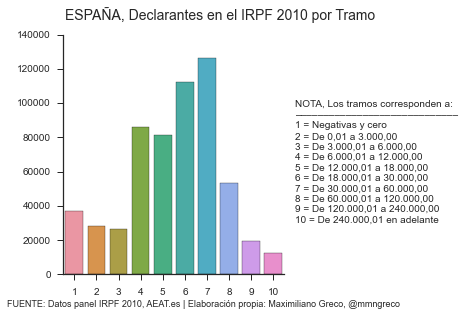

In [51]:
nota = u'''NOTA, Los tramos corresponden a:\n–––––––––––––––––––––––––––––'''
for k, v in trans_tramo.iteritems():
    nota += '\n%s = %s' % (k,v)

plt.figure(figsize=(10,10))
fg = sns.factorplot('tramo', 
                    data=dpob, 
                    kind='count', 
                    order=range(1,11))

fg.set_axis_labels('','')
# tittle
ttl= u'ESPAÑA, Declarantes en el IRPF 2010 por Tramo'
plt.gcf().text(0.2, 1, "%s" % ttl, fontsize=14, transform=(1,1))
# footnote
plt.gcf().text(0, 0.005, "%s" % foot, fontsize=9, transform=(1,1))
# nota
plt.gcf().text(1, 0.3, nota,)
plt.tight_layout()
plt.savefig(u'dist_declarantes_por_tramos_españa.png', bbox_inches='tight', dpi=100)


In [18]:
# crear tabla con frecuencias:
d_ccaa_tramo = dpob[['tramo', 'ccaa']]

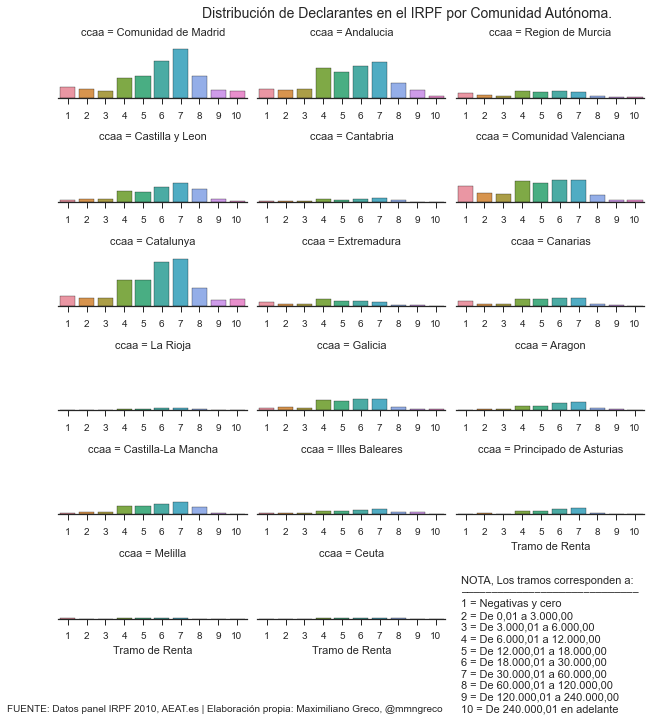

In [56]:
# text

ttl = u'Distribución de Declarantes en el IRPF por Comunidad Autónoma.'

nota = u'''NOTA, Los tramos corresponden a:\n–––––––––––––––––––––––––––––'''
for k, v in trans_tramo.iteritems():
    nota += '\n%s = %s' % (k,v)

# plot
fg = sns.factorplot('tramo',
                    col='ccaa',
                    size=1.5,
                    col_wrap=3,
                    data=d_ccaa_tramo,
                    aspect=2,
                    kind='count',
                    sharex=False, order=range(1,11))

fig = plt.gcf()

# title
fig.text(0.3, 1, "%s" % ttl, fontsize=14, transform=(1,1))
# footnote
fig.text(0, -0.07, "%s" % foot, fontsize=10, transform=(1,1))
# note
fig.text(.7,-.07, nota, fontsize=11)
# formato ejes
fg.despine(left=True, bottom=False)
# ticks ejes
fg.set(yticks=[])
fg.set_axis_labels("Tramo de Renta", "")

plt.savefig('hist_dist_tramo_by_ccaa.png', bbox_inches='tight', dpi=150)

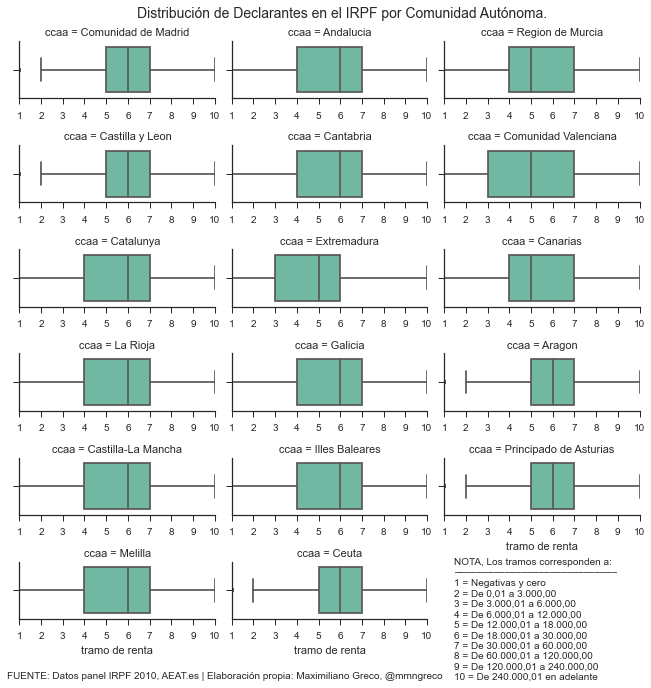

In [20]:
fg = sns.factorplot('tramo',
                    col='ccaa',
                    size=1.5,
                    col_wrap=3,
                    data=d_ccaa_tramo,
                    aspect=2,
                    kind='box',
                    sharex=False, order=range(1,11))

fig = plt.gcf()
fig.text(0.2, 1, "%s" % ttl, fontsize=14, transform=(1,1))
fig.text(0, -0.02, "%s" % foot, fontsize=10, transform=(1,1))
fig.text(.69,-.02, nota, fontsize=10)

fg.set_axis_labels("tramo de renta", "")

plt.savefig('box_dist_tramo_by_ccaa.png', bbox_inches='tight', dpi=150)

In [21]:
d_ccaa_tramo.head()

,tramo,ccaa
0,8,Comunidad de Madrid
1,9,Andalucia
2,5,Region de Murcia
3,6,Castilla y Leon
4,5,Comunidad de Madrid


In [25]:
ricos = dpob[['tramo', 'ccaa']][dpob.tramo > 8]

ccaa
Melilla                    0.178852
Ceuta                      0.216505
Cantabria                  0.960151
La Rioja                   1.220584
Extremadura                1.346094
Principado de Asturias     1.788516
Region de Murcia           1.879511
Canarias                   2.124255
Castilla-La Mancha         2.792595
Galicia                    3.517414
Aragon                     3.702542
Illes Baleares             4.358331
Castilla y Leon            5.491057
Comunidad Valenciana       6.702228
Andalucia                 16.015061
Catalunya                 22.503922
Comunidad de Madrid       25.202385
Name: tramo, dtype: float64
total	100.0


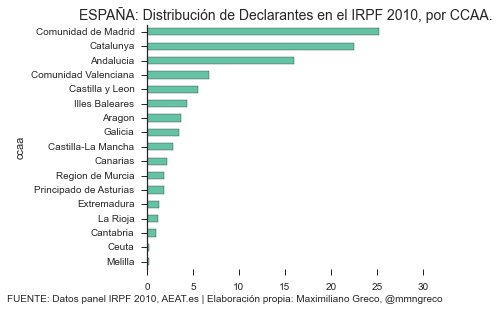

In [28]:
ttl = u'ESPAÑA: Distribución de Declarantes en el IRPF 2010, por CCAA.'
tot_count = dpob.ccaa[dpob.tramo > 8].count() # numero de declaraciones cuyos tramos son superiores a 7
f = lambda x: x * 100 / tot_count  # función: frecuencia relativa en %

ricos.groupby('ccaa').count('tramo').tramo.apply(f).order(ascending=True).plot(kind='barh')
plt.tight_layout()

# GUARDAR IMAGEN Y TEXTO
plt.gcf().text(0, 0, "%s" % foot, fontsize=10, transform=(1,1))

# Quitar las líneas del marco del eje.
ax = plt.gca()  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# Asegurarse de dejar sólo las marcas de la izquierda y abajo.
# Las marcas de la derecha y la parte superior del gráfico son generalmente basura innecesaria de la tabla.
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_title(ttl, fontsize=14)

plt.savefig('dist_ascending_tramo_by_ccaa.png', bbox_inches='tight', dpi=150)

nota = ''''''
print ricos.groupby('ccaa').count('tramo').tramo.apply(f).order(ascending=True)
print 'total\t', ricos.groupby('ccaa').count('tramo').tramo.apply(f).order(ascending=True).sum()

In [29]:
# sns.pairplot(dpob[['ccaa', 'tramo', 'c455', 'c465', 'c620', 'c630', 'c679', 'c698', 'c699']])

In [32]:
# CREAR DATAFRAME CON FRECUENCIAS ESTADISTICAS:

tramos = range(7,11)

for t in range(1, 3):
    d = dpob.ccaa[dpob.tramo == t]
    frec_ccaa = {}

    for c in list(d.unique()): # traducir cada ccaa por su nombre
        frec_ccaa[c] = d[d == c].count() # frecuencia absoluta de cada ccaa

    frec_ccaa = DataFrame(frec_ccaa, index=['N']) # crear el dataframe con los datos absolutos

    frec_ccaa = frec_ccaa.T # trasponer el dataframe para que los indices sean ccaa
    frec_ccaa['f'] = divide(frec_ccaa.N * 100, frec_ccaa.N.sum(), dtype='float') # creamos frencuencia relativa
    frec_ccaa['F'] = cumsum(frec_ccaa.f) # creamos la frecuencia acumulada



In [33]:
frec_ccaa


,N,f,F
Andalucia,4018,14.358205,14.358205
Aragon,612,2.186964,16.545169
Canarias,1344,4.802744,21.347913
Cantabria,615,2.197684,23.545597
Castilla y Leon,1413,5.049314,28.594911
Castilla-La Mancha,1065,3.805746,32.400658
Catalunya,4321,15.440966,47.841624
Ceuta,33,0.117925,47.959548
Comunidad Valenciana,4576,16.352201,64.311750
Comunidad de Madrid,4470,15.973413,80.285163


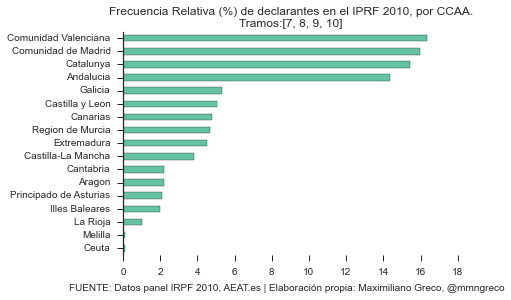

In [34]:
ttl = u'Frecuencia Relativa (%) de declarantes en el IPRF 2010, por CCAA.\nTramos:' + str(tramos)
# plot
frec_ccaa.f.order(ascending=True).plot(kind='barh')

# aspecto
ax=plt.gca()
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# Las marcas de la derecha y la parte superior
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.title(ttl)
plt.gcf().text(0, 0, "%s" % foot, fontsize=10, transform=(1,1))

# guadar imagen
plt.savefig('frec_relativa_dist_por_ccaa.png', bbox_inches='tight', dpi=150)



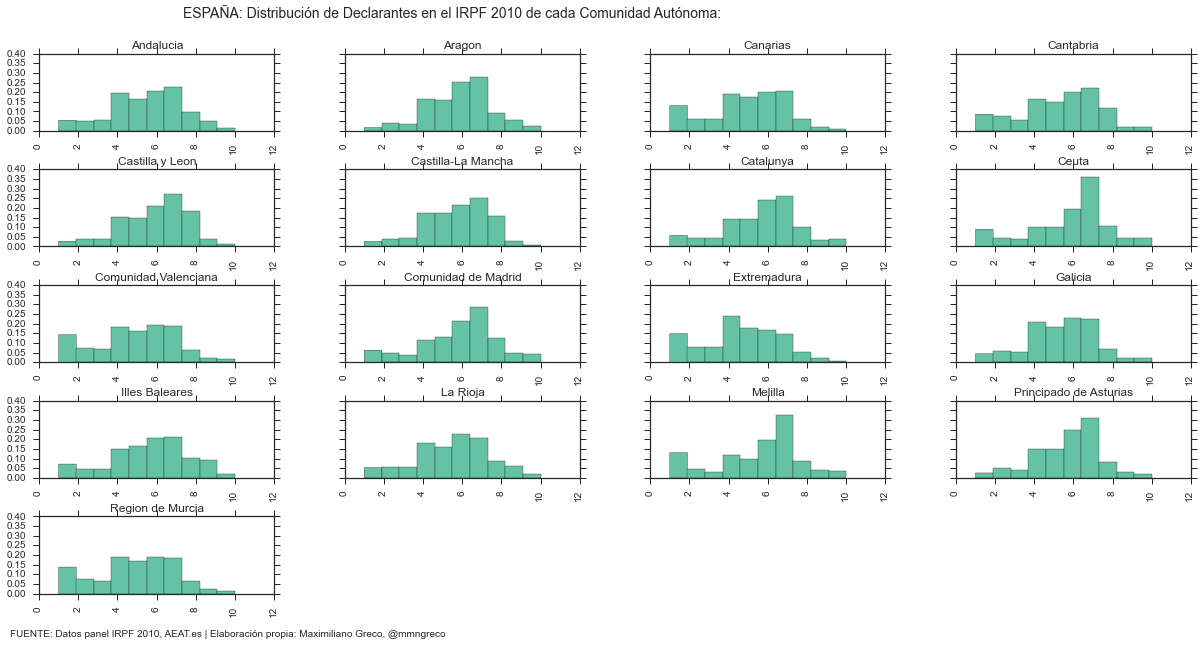

In [35]:
ttl = u'ESPAÑA: Distribución de Declarantes en el IRPF 2010 de cada Comunidad Autónoma:'

hist = d_ccaa_tramo.hist(by='ccaa', 
                         column='tramo', 
                         sharey=True, 
                         figsize=(20,10), 
                         normed=True)
fig = plt.gcf()

#TITLE
fig.text(0.2, 
         0.95, 
         "%s" % ttl, 
         fontsize=14, 
         transform=(1,1))
#FOOTNOTE
fig.text(0.08, 
         0.09, 
         "%s" % foot, 
         fontsize=10, 
         transform=(1,1))
#NOTE
fig.text(.77, 
         .08, 
         nota, 
         fontsize=11)

plt.savefig('hists_frec_relativa_dist_tramo_by_ccaa.png', bbox_inches='tight', dpi=150)

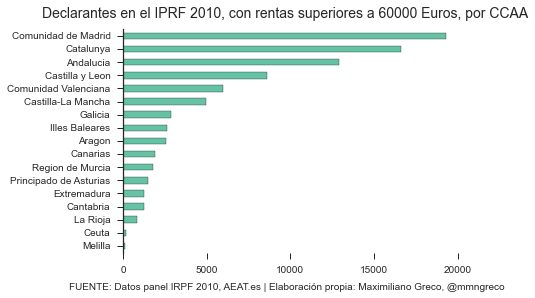

In [36]:
ttl = u'Declarantes en el IPRF 2010, con rentas superiores a 60000 Euros, por CCAA'
ccaa = dpob.ccaa.unique()
d = dict()
for ca in ccaa:
    d[ca] = d_ccaa_tramo[(d_ccaa_tramo.tramo > 7) & (d_ccaa_tramo.ccaa == ca)].ccaa.count()

d = DataFrame(d, index=['Declarantes']).T
d.Declarantes.order(ascending=True).plot(kind='barh')
plt.suptitle(ttl, fontsize=14)

# GUARDAR IMAGEN Y TEXTO
#plt.gcf().text(0.2, 1, "%s" % ttl, fontsize=14, transform=(100,100))
plt.gcf().text(0, -.001, "%s" % foot, fontsize=10, transform=(100,100))

# Quitar las líneas del marco del eje.
ax = plt.gca()
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# Asegurarse de dejar sólo las marcas de la izquierda y abajo.
# Las marcas de la derecha y la parte superior del gráfico son generalmente basura innecesaria de la tabla.
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()



plt.savefig('seaborn_hist_dist_tramo_by_ccaa.png', bbox_inches='tight', dpi=150)

In [37]:
d.head()

,Declarantes
Andalucia,12917
Aragon,2569
Canarias,1924
Cantabria,1284
Castilla y Leon,8576


# ¿Qué CCAA tienen mayores ingresos?

Cuota Líquida total, nos dice lo que los declarantes pagan por los bienes y servicios que provee el Estado. Por tanto, nuestra variable será c720 + c721 = CUOTA LIQUIDA TOTAL, que tendremos que crear.

In [38]:
dpob['cltotal'] = dpob.c720 + dpob.c721
dpob.cltotal.head() # ver la serie creada.

0    124123.400872
1     81862.870338
2     72911.507357
3     14648.768222
4      8855.957568
Name: cltotal, dtype: float64

In [39]:
dpob.head()

,ccaa,tramo,marcafuente,factor,fechappal,sexoppal,tipotributacion,categoriadecla,minimosdecla,rentamuestreo,...,c465,c620,c630,c679,c698,c699,c720,c721,c732,cltotal
0,Comunidad de Madrid,8,0,10.164443,19600124,1,I,4,2,70218.84,...,472.849889,713262.548221,472.849889,111971.504308,104976.842844,103653.229074,62723.456499,61399.944373,124123.400872,124123.400872
1,Andalucia,9,0,1.006695,19520412,1,I,4,2,229279.32,...,9812.344760,206360.936315,9812.344760,6109.630705,41139.599519,41139.599519,40931.435169,40931.435169,81862.870338,81862.870338
2,Region de Murcia,5,1,50.027794,19540408,1,C,3,4,17384.22,...,26067.982557,540857.983806,26067.982557,257693.166276,36455.753678,36455.753678,36455.753678,36455.753678,72911.507357,72911.507357
3,Castilla y Leon,6,0,15.569221,19650716,2,C,2,3,18759.39,...,5051.122220,253544.133725,5051.122220,108782.143913,17851.201195,17851.201195,7324.384111,7324.384111,14648.768222,14648.768222
4,Comunidad de Madrid,5,1,52.682674,19330422,1,C,3,4,16732.32,...,238448.106301,294478.237843,238448.106301,486313.767479,4427.978784,4427.978784,4427.978784,4427.978784,8855.957568,8855.957568


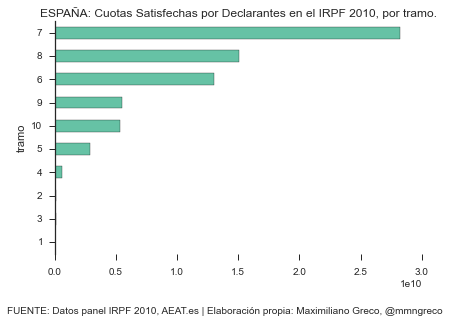

In [40]:
#tot_count = dpob.ccaa[dpob.tramo > 7].count()

dpob.groupby(['tramo']).cltotal.sum().order(ascending=True).plot(kind='barh')
plt.tight_layout()

# GUARDAR IMAGEN Y TEXTO
ttl = u'ESPAÑA: Cuotas Satisfechas por Declarantes en el IRPF 2010, por tramo.'
#plt.gcf().text(0.2, 1, "%s" % ttl, fontsize=14, transform=(1,1))
plt.gcf().text(0, -0.05, "%s" % foot, fontsize=10, transform=(1,1))


# Quitar las líneas del marco del eje.
ax = plt.gca()  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  


# Las marcas de la derecha y la parte superior del gráfico
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_title(ttl)
ax.set_xlabel('')

plt.savefig('sum_ascending_cuota_by_tramo.png', bbox_inches='tight', dpi=150)


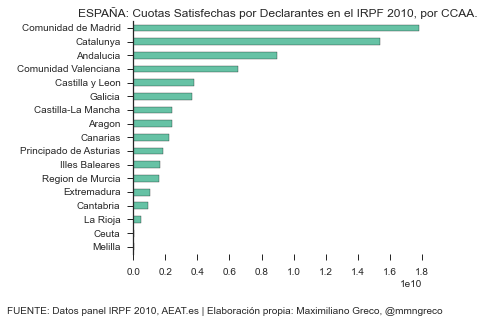

In [41]:
ccaa = dpob.ccaa.unique()
ccaa_cltotal = dict()
for ca in ccaa:
    ccaa_cltotal[ca] = dpob.cltotal[dpob.ccaa == ca].sum()

ccaa_cltotal = DataFrame(ccaa_cltotal, index=['cltotal']).T

ccaa_cltotal.cltotal.order(ascending=True).plot(kind='barh')


plt.tight_layout()

# GUARDAR IMAGEN Y TEXTO
ttl = u'ESPAÑA: Cuotas Satisfechas por Declarantes en el IRPF 2010, por CCAA.'
#plt.gcf().text(0.2, 1, "%s" % ttl, fontsize=14, transform=(1,1))
plt.gcf().text(0, -0.05, "%s" % foot, fontsize=10, transform=(1,1))


# Quitar las líneas del marco del eje.
ax = plt.gca()  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  


# Las marcas de la derecha y la parte superior del gráfico
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_title(ttl)
ax.set_xlabel('')

plt.savefig('sum_ascending_cuota_by_ccaa3.png', bbox_inches='tight', dpi=150)


# ¿Cuanto va para el estado y cuando para la CA?

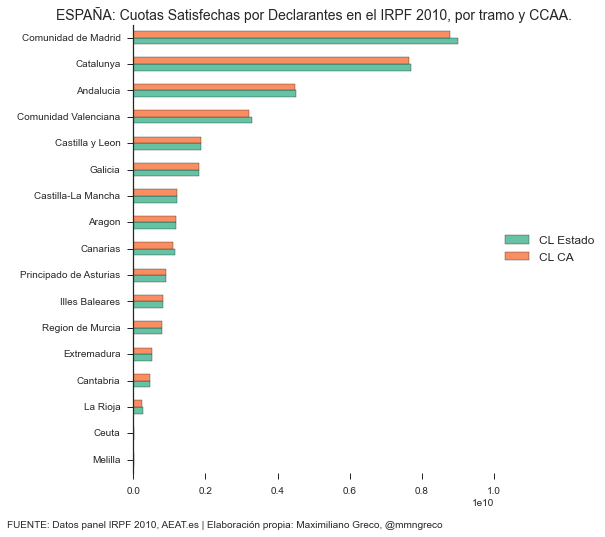

In [64]:
ccaa_cl = dict()
for ca in ccaa:
    ccaa_cl[ca] = [dpob.c720[dpob.ccaa == ca].sum(),
                   dpob.c721[dpob.ccaa == ca].sum()]

ccaa_cl = DataFrame(ccaa_cl, index=['cl_estado', 'cl_ca']).T
ccaa_cl.sort('cl_estado', inplace=True, ascending=True)
ccaa_cl.plot(kind='barh', figsize=(7,7))

plt.tight_layout()

# GUARDAR IMAGEN Y TEXTO
ttl = u'ESPAÑA: Cuotas Satisfechas por Declarantes en el IRPF 2010, por tramo y CCAA.'
#plt.gcf().text(0.2, 1, "%s" % ttl, fontsize=14, transform=(1,1))
plt.gcf().text(0, -0.02, "%s" % foot, fontsize=10, transform=(1,1))


# Quitar las líneas del marco del eje.
ax = plt.gca()  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  


# Las marcas de la derecha y la parte superior del gráfico
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_title(ttl, fontsize=14)
ax.set_xlabel('')
plt.legend(['CL Estado', 'CL CA'], fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('sum_ascending_cuota_liquida_estado_ca_by_ccaa.png', bbox_inches='tight', dpi=150)